In [4]:
import requests
from bs4 import BeautifulSoup
import re

In [2]:
stazioni_url = "https://www.mareografico.it/it/stazioni.html"
stazioni_page = BeautifulSoup(requests.get(stazioni_url).text, "html.parser")

In [11]:
ids = [
    tag.attrs["id"]
    for tag in stazioni_page.find_all("li", attrs={"id": re.compile(r"St-\d+")})
]
# Get the unique list of ids
ids = list(set(ids))

In [64]:
def data_payload(request_id, station_id):
    return {
        "k": request_id,
        "l": "it",
        "id": "",
        "w": "910",
        "h": "445",
        "o": "T",
        "r": "1",
        "s": station_id.split("-")[1],
        "t": "P195001010000202402031500",
        "p": "|4|",
        "mn": "",
        "mx": "",
        "mn2": "",
        "mx2": "",
        "run": "1",
        "debug": "",
    }

def data_cookie(session_cookies, station_id):
    session_id = session_cookies.get("PHPSESSID")
    session_cookies.set(f"MG{session_id}", f"][1][{station_id.split("-")[1]}][][][][][][][1][1")
    session_cookies.set("A4IxScreenSize", r"1440%40783%402%40it")
    return session_cookies

def download_station_data(station_id):
    url = "https://www.mareografico.it/APPS/mareo_data.php"
    with requests.Session() as s:
        initial_req = s.get(stazioni_url)
        session_id = initial_req.cookies["PHPSESSID"]
        station_resp = s.get(stazioni_url, cookies=data_cookie(s.cookies, station_id))
        lat, lon = re.findall(r"latitude=(\d+\.\d+)&longitude=(\d+\.\d+)", station_resp.text)[0]
        # name = re.findall(f"<li id='St-{station_id.split("-")[1]}' class='dMsel'>(.+?)</li>", station_resp.text)[0]
    return station_resp, session_id, s.cookies.get_dict(), lat, lon


In [65]:
resp, sid, cookies, lat, lon = download_station_data(ids[0])

In [66]:
cookies

{'PHPSESSID': 'n4vhdi55fobp7e8t0oeqbiu10j',
 'MGn4vhdi55fobp7e8t0oeqbiu10j': '][1][20][][][][][][][1][1',
 'A4IxScreenSize': '1440%40783%402%40it'}

In [67]:
re.findall(r"latitude=(\d+\.\d+)&longitude=(\d+\.\d+)", resp.text)[0]

('43.624802', '13.50651')

In [68]:
f"<li id='{ids[0]}' class='dMsel'>(.+?)</li>"

"<li id='St-20' class='dMsel'>(.+?)</li>"

In [69]:
re.findall(f"<li id='St-(\\d+)' class='dMsel'>(.+?)</li>", resp.text)

[('1', 'ANCONA')]

In [24]:
ids[0]

'St-20'

<!DOCTYPE html>
<html lang='it'>
<head>
<meta charset='UTF-8'>
<meta http-equiv='Expires' content='Tue, 01 Jan 1970 00:00:00 GMT'>
<meta http-equiv='Cache-Control' content='max-age=0'>
<meta http-equiv='Cache-Control' content='no-store'>
<meta http-equiv='Pragma' content='no-cache'>
<title>stazioni</title>
<meta name="viewport" content="width=device-width, initial-scale=1.0" / >
<meta name="ROBOTS" content="INDEX,FOLLOW" >
<meta name="description" content="ISPRA Istituto Superiore per la Protezione e la Ricerca Ambientale - Reti di monitoraggio marino" >
<meta property='og:url' content='https://www.mareografico.it/it/stazioni.html'>
<meta property='og:type' content='website'>
<meta property='og:title' content='stazioni'>
<link rel='canonical' href='https://www.mareografico.it/it/stazioni.html'>
<link rel='shortcut icon' href='favicon.ico' type='image/x-icon'>
<link rel='icon' type='image/png' sizes='16x16' href='/DATA/B239.png'>
<link rel='icon' type='image/png' sizes='32x32' href='/DA
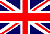

In [20]:
print(resp.text)